<a href="https://colab.research.google.com/github/JoMihye/Python/blob/main/ml03_train_test_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   훈련 셋과 테스트 셋을 나누는 방법
    *   순차적 추출(sequential sampling)
    *   임의 추출(random sampling)
    *   층화 추출(stratified sampling)
*   분류 모델 평가 지표(metrics)
    *   정확도(accuracy)
    *   정밀도(precision)
    *   재현율(recall)
    *   F1-score
*   특성 스케일링(feature scaling)
    *   표준화(standardization)
    *   정규화(normalization)

# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier  # KNN 분류기(모델)
from sklearn.model_selection import train_test_split  # 훈련/테스트 셋 분리 함수
from sklearn.metrics import confusion_matrix, classification_report  # 모델 평가 지표
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # 변환기(특성 스케일링)

# 데이터 준비

In [ ]:
# fish 데이터 셋
fish_csv = 'https://github.com/rickiepark/hg-mldl/raw/master/fish.csv'

In [ ]:
fish = pd.read_csv(fish_csv)

In [ ]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


*  이진 분류: Bream(도미) vs Smelt(빙어)
*  독립변수: Weight(무게), Length(길이)

In [ ]:
# 데이터 - 물고기의 무게와 길이를 저장한 2차원 배열
X = fish.loc[fish.Species.isin(['Bream', 'Smelt']), ['Weight', 'Length']].values

In [ ]:
X.shape

(49, 2)

In [ ]:
X[:5]

array([[242. ,  25.4],
       [290. ,  26.3],
       [340. ,  26.5],
       [363. ,  29. ],
       [430. ,  29. ]])

In [ ]:
# 타겟(레이블, 종속변수, 관심변수) - 물고기 종류를 저장한 1차원 배열
y = fish.loc[fish.Species.isin(['Bream', 'Smelt']), 'Species'].values

In [ ]:
y.shape

(49,)

In [ ]:
y

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt',
       'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt'],
      dtype=object)

# 훈련 셋/테스트 셋 분리

## 순차 추출(sequential sampling)

In [ ]:
# 훈련 셋과 테스트 셋의 비율을 7:3 비율로 나눔.
num_trains = 35  # 훈련 셋의 샘플 개수

In [ ]:
X_train = X[:num_trains]  # 훈련 셋
X_test = X[num_trains:]  # 테스트 셋
y_train = y[:num_trains]  # 훈련 레이블
y_test = y[num_trains:]  # 테스트 레이블

In [ ]:
X_train.shape, X_test.shape

((35, 2), (14, 2))

In [ ]:
X_train[:5]

array([[242. ,  25.4],
       [290. ,  26.3],
       [340. ,  26.5],
       [363. ,  29. ],
       [430. ,  29. ]])

In [ ]:
y_train.shape, y_test.shape

((35,), (14,))

In [ ]:
y_train

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream'],
      dtype=object)

In [ ]:
y_test

array(['Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt',
       'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt'],
      dtype=object)

In [ ]:
np.unique(y_train, return_counts=True)
#> return: y_train 배열에서 unique한 값들로 이루어진 배열, unique한 값들의 개수들의 배열.

(array(['Bream'], dtype=object), array([35]))

In [ ]:
np.unique(y_test, return_counts=True)

(array(['Smelt'], dtype=object), array([14]))

특성 행렬(데이터)이 무작위로 섞여있지 않고 물고기 종류에 대해서 정렬된 상태였기 때문에, 훈련 셋과 훈련 레이블에서는 도미(Bream)만 선택됐고, 테스트 셋과 테스트 레이블에서는 빙어(Smelt)만 선택됨. --> __샘플링 편향(sampling bias)__

### KNN 모델을 훈련, 평가

In [ ]:
knn = KNeighborsClassifier()  # 모델 생성

In [ ]:
knn.fit(X_train, y_train)  # 모델 훈련

KNeighborsClassifier()

In [ ]:
train_acc = knn.score(X_train, y_train)  # 훈련 셋에서의 정확도
train_acc

1.0

In [ ]:
test_acc = knn.score(X_test, y_test)  # 테스트 셋에서의 정확도
test_acc

0.0

In [ ]:
knn.predict(X_test)  # 테스트 셋의 예측값

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream'],
      dtype=object)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                 train_size=35,  # 훈련 셋의 샘플 개수
                 shuffle=False)  # 데이터를 무작위로 섞을 것인 지.
# shuffle=False: 순차 추출(sequential sampling)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35, 2), (14, 2), (35,), (14,))

In [ ]:
np.unique(y_train, return_counts=True)

(array(['Bream'], dtype=object), array([35]))

In [ ]:
np.unique(y_test, return_counts=True)

(array(['Smelt'], dtype=object), array([14]))

## 임의 추출(random sampling)

In [ ]:
idx = np.arange(49)
print(idx)

np.random.seed(1)
np.random.shuffle(idx)  # 배열 idx를 무작위로 섞음.
print(idx)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]
[27 34 39 48  2  3 42 29 45 30 31 38 21 35 19 41 36 26 22 13 40 17 44 24
 23  4 32 14 10 28 47 33 18 20 25  6  7 46  1 16  0 15  5 11  9  8 12 43
 37]


In [ ]:
train_idx = idx[:35]
print(train_idx)
test_idx = idx[35:]
print(test_idx)

[27 34 39 48  2  3 42 29 45 30 31 38 21 35 19 41 36 26 22 13 40 17 44 24
 23  4 32 14 10 28 47 33 18 20 25]
[ 6  7 46  1 16  0 15  5 11  9  8 12 43 37]


In [ ]:
X_train = X[train_idx]  # 훈련 셋
y_train = y[train_idx]  # 훈련 레이블

In [ ]:
np.unique(y_train, return_counts=True)

(array(['Bream', 'Smelt'], dtype=object), array([24, 11]))

In [ ]:
X_test = X[test_idx]  # 테스트 셋
y_test = y[test_idx]  # 테스트 레이블

In [ ]:
np.unique(y_test, return_counts=True)

(array(['Bream', 'Smelt'], dtype=object), array([11,  3]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=35,
                                                    random_state=1,  # 난수 seed 설정
                                                    shuffle=True)  # 임의 추출

In [ ]:
X_train.shape, X_test.shape

((35, 2), (14, 2))

In [ ]:
y_train.shape, y_test.shape

((35,), (14,))

In [ ]:
np.unique(y_train, return_counts=True)

(array(['Bream', 'Smelt'], dtype=object), array([27,  8]))

In [ ]:
np.unique(y_test, return_counts=True)

(array(['Bream', 'Smelt'], dtype=object), array([8, 6]))

### 임의 추출 샘플에서 KNN 훈련, 평가

In [ ]:
knn = KNeighborsClassifier()  # 모델 생성

In [ ]:
knn.fit(X_train, y_train)  # 모델 훈련 - 지도 학습

KNeighborsClassifier()

In [ ]:
knn.score(X_train, y_train)  # 훈련 셋에서의 정확도

1.0

In [ ]:
knn.score(X_test, y_test)  # 테스트 셋에서의 정확도

1.0

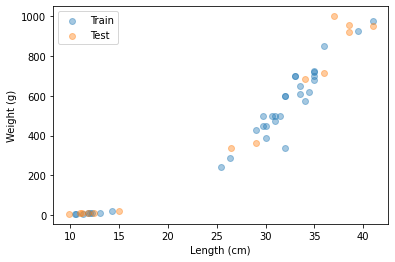

In [ ]:
# 훈련 셋과 테스트 셋 시각화
plt.scatter(X_train[:, 1], X_train[:, 0], label='Train', alpha=0.4)
plt.scatter(X_test[:, 1], X_test[:, 0], label='Test', alpha=0.4)

plt.legend()  # 범례 표시
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.show()

### 임의 추출의 문제점

In [ ]:
species, counts = np.unique(y, return_counts=True)
print(species)
print(counts)

['Bream' 'Smelt']
[35 14]


In [ ]:
counts / 49  # 전체 샘플에서 도미와 빙어의 비율

array([0.71428571, 0.28571429])

In [ ]:
tr_species, tr_counts = np.unique(y_train, return_counts=True)
print(tr_species)
print(tr_counts)

['Bream' 'Smelt']
[27  8]


In [ ]:
tr_counts / 35  # 훈련 레이블에서 도미(Bream)와 빙어(Smelt)의 비율

array([0.77142857, 0.22857143])

In [ ]:
te_species, te_counts = np.unique(y_test, return_counts=True)
print(te_species)
print(te_counts)

['Bream' 'Smelt']
[8 6]


In [ ]:
te_counts / 14  # 테스트 레이블에서 도미와 빙어의 비율

array([0.57142857, 0.42857143])

임의 추출에서는 전체 샘플에서 각 클래스(도미, 빙어)의 비율이 훈련 셋과 테스트 셋에서 유지되지 않을 수도 있음.

그런 경우, 머신 러닝 모델의 성능이 안 좋아질 수 있음.

전체 샘플에서 각 클래스의 비율이 훈련 셋과 테스트 셋에서도 비슷하게 유지되도록 샘플링하는 것이 중요.

## 층화 추출(stratified sampling)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=1,
                                                    shuffle=True,
                                                    stratify=y)
# train_test_split 함수의 파라미터:
#   X, y: 훈련/테스트로 나눌 배열들.
#   test_size: 정수이면 테스트 셋의 샘플 개수, 0 ~ 1 사이의 실수이면 테스트 셋의 비율.
#   train_size: 정수이면 훈련 셋의 샘플 개수, 0 ~ 1 사이의 실수이면 훈련 셋의 비율.
#   test_size 또는 train_size 둘 중 하나가 결정되면, 나머지 하나는 자동으로 계산.
#   shuffle: True=샘플들을 무작위로 섞음. False=샘플들을 섞지 않음. True가 기본값.
#   stratify: 층화 추출의 기분이 되는(각 클래스의 비율을 알 수 있는) 1차원 배열.
#   random_state: 난수 seed 설정값.

In [ ]:
X_train.shape, X_test.shape

((34, 2), (15, 2))

In [ ]:
y_train.shape, y_test.shape

((34,), (15,))

In [ ]:
tr_species, tr_counts = np.unique(y_train, return_counts=True)
print(tr_species)
print(tr_counts)

['Bream' 'Smelt']
[24 10]


In [ ]:
tr_counts / 34

array([0.70588235, 0.29411765])

In [ ]:
te_species, te_counts = np.unique(y_test, return_counts=True)
print(te_species)
print(te_counts)

['Bream' 'Smelt']
[11  4]


In [ ]:
te_counts / 15

array([0.73333333, 0.26666667])

### 층화 추출 샘플에서 KNN 모델 훈련, 평가

In [ ]:
knn = KNeighborsClassifier()  # 모델 생성

In [ ]:
knn.fit(X_train, y_train)  # 모델 훈련

KNeighborsClassifier()

In [ ]:
knn.score(X_train, y_train)  # 훈련 셋에서의 정확도

1.0

In [ ]:
knn.score(X_test, y_test)  # 테스트 셋에서의 정확도

1.0

# 분류 평가 지표

In [ ]:
test_pred = knn.predict(X_test)  # 테스트 셋 예측값
confusion_matrix(y_test, test_pred)  # 테스트 셋에서의 오차 행렬(혼동 행렬)

array([[11,  0],
       [ 0,  4]])

__분류 평가 지표(classification metrics)__

*  용어 정리
    *  TP(True Positive, 진짜 양성): 실제 양성인 것을 양성으로 맞게 예측한 것.
    *  FN(False Negative, 가짜 음성): 실제 양성인 것을 음성으로 틀리게 예측한 것.
    *  FP(False Positive, 가짜 양성): 실제 음성인 것을 양성으로 틀리게 예측한 것.
    *  TN(True Negative, 진짜 음성): 실제 음성인 것을 음성으로 맞게 예측한 것.

*  정확도(accuracy): 샘플들을 정확하게 분류한 비율. 전체 샘플들 중에서 정답의 비율.
>  accuracy = (TP + TN) / (TP + FN + FP + TN)

*  정밀도(precision): 양성 예측들 중에서 정답의 비율.
>  precision = TP / (TP + FP)

*  재현율(recall): 실제 양성 샘플들 중에서 정답의 비율.
>  recall = TP / (TP + FN)

*  F1-score: 정밀도와 재현율의 조화 평균(역수들의 평균의 역수)
>  f1-score = 2 / (1/precision + 1/recall)

In [ ]:
clf_report = classification_report(y_test, test_pred)
print(clf_report)

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        11
       Smelt       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [ ]:
precision_score(y_test, test_pred, pos_label='Bream')
# pos_label: positive(양성)로 취급할 레이블.

1.0

In [ ]:
precision_score(y_test, test_pred, pos_label='Smelt')

1.0

# 특성 스케일링(feature scaling)

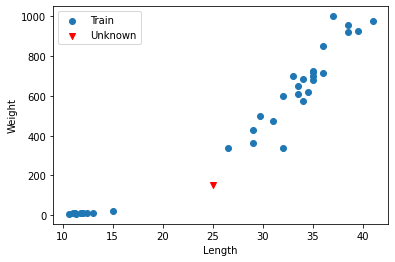

In [ ]:
# 훈련 셋(X_train)을 시각화
plt.scatter(X_train[:, 1], X_train[:, 0], label='Train')

# 가상의 물고기 데이터(150g, 25cm)
unknown = [[150, 25]]  # (1, 2) shape의 2차원 배열
plt.scatter(25, 150, label='Unknown', marker='v', color='red')

plt.legend()
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

In [ ]:
# 가상의 물고기의 예측값
knn.predict(unknown)

array(['Smelt'], dtype=object)

In [ ]:
# 가상의 물고기에서 가장 가까운 (훈련 셋) 이웃 5개.
neighbor_index = knn.kneighbors(unknown, return_distance=False)
neighbor_index

array([[ 7,  5, 15, 26,  2]])

In [ ]:
# 가상의 물고기에서 가장 가까운 이웃 5개의 레이블.
y_train[neighbor_index[0]]

array(['Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt'], dtype=object)

* 생선의 두 특성(길이, 무게)는 서로 단위(cm, g)가 다르기 때문에, 값의 범위도 매우 다름.
    * 길이 범위: 0 ~ 50 cm, 무게 범위: 0 ~ 1,000 g
    * 특성(변수)들의 스케일이 다름!
    * 가장 가까운 이웃을 찾기 위해서 거리를 계산할 때, 생선의 길이가 거리에 미치는 영향은 생선의 무게가 거리에 미치는 영향에 비해 작음.
    * 예측을 할 때 거리 계산에 영향이 적은 변수(특성)는 무시되기 쉬움.
    * 예측 결과가 부정확해 질 수 있음.
    * 따라서, 모든 특성(변수)들이 거리 계산에 비슷한 영향을 미칠 수 있도록 스케일을 변환할 필요가 있음.
* KNN과 같이 거리 기반의 머신 러닝 알고리즘에서는, 모델을 훈련하기 전에 모든 특성(변수)들을 비슷한 스케일이 되도록 전처리(preprocessing)를 할 필요가 있음!
    * **표준화(standardization)**: *훈련 셋*의 평균과 표준편차를 사용해서, 평균이 0이 되고 표준편차가 1이 되도록 스케일을 변환하는 것.
    * **정규화(normalization)**: *훈련 셋*의 최솟값과 최댓값을 사용해서, 최솟값은 0이 되고 최댓값은 1이 되도록 스케일을 변환하는 것.

## 표준화

### 스케일러 생성과 훈련/테스트 셋 스케일링

In [ ]:
std_scaler = StandardScaler()  # 표준화 특성 스케일 변환기 생성

In [ ]:
std_scaler.fit(X_train)  # 훈련 셋의 평균과 표준편차를 찾음.

StandardScaler()

In [ ]:
std_scaler.mean_  #> [X_train Weight 평균, X_train Length 평균]

array([475.36470588,  27.59705882])

In [ ]:
std_scaler.var_  #> [X_train Weight 분산, X_train Length 분산]

array([1.16589375e+05, 1.10007344e+02])

In [ ]:
np.mean(X_train, axis=0)

array([475.36470588,  27.59705882])

In [ ]:
np.var(X_train, axis=0)

array([1.16589375e+05, 1.10007344e+02])

In [ ]:
X_train_std = std_scaler.transform(X_train)  # 훈련 셋을 표준화

In [ ]:
X_train[:5]

array([[  8.7,  11.3],
       [500. ,  29.7],
       [  9.9,  11.8],
       [850. ,  36. ],
       [  7. ,  10.6]])

In [ ]:
X_train_std[:5]

array([[-1.36670716, -1.55381172],
       [ 0.07214866,  0.20050088],
       [-1.36319275, -1.50614018],
       [ 1.09718333,  0.80116226],
       [-1.3716859 , -1.62055187]])

In [ ]:
# (훈련 셋에서 찾은 평균과 표준편차를 사용해서) 테스트 셋을 스케일링.
X_test_std = std_scaler.transform(X_test)

In [ ]:
X_test[:5]

array([[  6.7,   9.8],
       [ 19.7,  14.3],
       [  7.5,  10.5],
       [600. ,  32. ],
       [500. ,  31.5]])

In [ ]:
X_test_std[:5]

array([[-1.3725645 , -1.69682633],
       [-1.33449178, -1.26778249],
       [-1.37022156, -1.63008618],
       [ 0.36501571,  0.41978996],
       [ 0.07214866,  0.37211842]])

In [ ]:
std_scaler2 = StandardScaler()
std_scaler2.fit_transform(X_train)
# (1) std_scaler.fit(X_train)
# (2) std_sclaer.transform(X_train)
# fit_transform() 메서드는 훈련 셋에서만 사용해야 함.
# 테스트 셋에서는 transform() 메서드만 사용해야 함.

array([[-1.36670716e+00, -1.55381172e+00],
       [ 7.21486591e-02,  2.00500881e-01],
       [-1.36319275e+00, -1.50614018e+00],
       [ 1.09718333e+00,  8.01162260e-01],
       [-1.37168590e+00, -1.62055187e+00],
       [-1.35294241e+00, -1.44893434e+00],
       [ 5.11449234e-01,  5.62804570e-01],
       [-1.33390605e+00, -1.20104234e+00],
       [ 7.16456169e-01,  7.05819184e-01],
       [ 5.99309349e-01,  7.05819184e-01],
       [ 6.57882759e-01,  5.15133032e-01],
       [-3.96438621e-01,  4.19789956e-01],
       [ 6.98884146e-01,  8.01162260e-01],
       [-3.29079199e-01,  1.33760727e-01],
       [ 6.13952701e-01,  6.10476108e-01],
       [-1.35645681e+00, -1.39172849e+00],
       [ 3.65015709e-01,  4.19789956e-01],
       [ 7.31099521e-01,  7.05819184e-01],
       [ 1.31683362e+00,  1.13486303e+00],
       [ 1.30219027e+00,  1.03951995e+00],
       [-3.96438621e-01, -1.04596963e-01],
       [-1.06810336e-03,  3.24446880e-01],
       [ 2.91798947e-01,  6.10476108e-01],
       [-1.

scikit-learn 클래스:

*   예측기(Estimator)
    *   머신 러닝 모델: e.g. KNeighborsClassifier
    *   생성자 호출 --> fit(훈련 셋) --> predict: 예측
*   변환기(Transformer)
    *   전처리: e.g. StandardScaler
    *   생성자 호출 --> fit(훈련 셋) --> transform: 변환


### 스케일링된 훈련 셋으로 모델 훈련

In [ ]:
knn = KNeighborsClassifier()  # 모델 생성

In [ ]:
knn.fit(X_train_std, y_train)  # 모델 훈련

KNeighborsClassifier()

In [ ]:
train_pred = knn.predict(X_train_std)  # 스케일링된 훈련 셋의 예측값
train_pred

array(['Smelt', 'Bream', 'Smelt', 'Bream', 'Smelt', 'Smelt', 'Bream',
       'Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Smelt', 'Smelt', 'Bream',
       'Smelt', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [ ]:
test_predict = knn.predict(X_test_std)  # 스케일링된 테스트 셋의 예측값
test_predict

array(['Smelt', 'Smelt', 'Smelt', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream'], dtype=object)

In [ ]:
knn.score(X_train_std, y_train)  # 훈련 셋에서의 정확도

1.0

In [ ]:
knn.score(X_test_std, y_test)  # 테스트 셋에서의 정확도

1.0

In [ ]:
# 150g 25cm인 가상의 물고기의 스케일 변환
unknown_std = std_scaler.transform(unknown)
unknown_std

array([[-0.95288602, -0.24761158]])

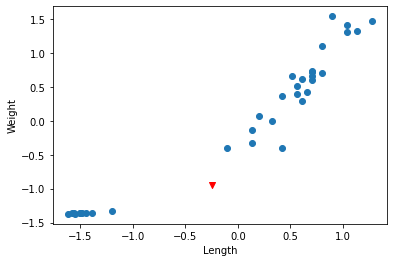

In [ ]:
# 표준화 스케일링이 끝난 훈련 셋 시각화
plt.scatter(X_train_std[:, 1], X_train_std[:, 0], label='Train')
# 표준화 스케일링이 끝난 가상의 물고기
plt.scatter(unknown_std[:, 1], unknown_std[:, 0], label='Unknown', marker='v', color='red')

plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

In [ ]:
# 스케일 변환된 가상의 물고기 데이터의 가장 가까운 이웃 5개
neighbor_index = knn.kneighbors(unknown_std, return_distance=False)
neighbor_index

array([[20, 13, 11, 23,  7]])

In [ ]:
# 가장 가까운 이웃들의 레이블
y_train[neighbor_index[0]]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Smelt'], dtype=object)

In [ ]:
knn.predict(unknown_std)

array(['Bream'], dtype=object)

## 정규화. Min-Max Scaling.

*   Min-Max Scaler 객체 생성
*   훈련 셋의 최솟값과 최댓값을 찾아서, 훈련 셋과 테스트 셋의 스케일을 변환
*   KNN 분류기 객체 생성
*   모델 훈련
*   훈련 셋 예측값, 정확도
*   테스트 셋 예측값, 정확도
*   (150g, 25cm) 가상의 물고기 데이터를 min-max scaling.
    *   스케일 변환된 훈련 셋과 가상의 물고기 데이터를 시각화.
    *   가상의 물고기의 예측값.

In [ ]:
# X: 특성 행렬(feature matrix), y: 타겟 배열(target array)

iris

1. train/test split
2. StandardScaler scaling
3. KNN train
4. 예측, 평가